# Дз 3. Тестирование статистических гипотез

<div class="alert alert-info" role="alert">

Важно!

* Плагиат карается обнулением работы
* При использовании чужого кода из открытых источников необходимо указать ссылку на источник
* В каждой задаче необходимо обосновывать выбор статистического критерия, формулировать нулевую и альтернативную гипотезу и делать интерпретацию получившихся результатов, а также содержательный вывод.
* Весь текст оформляется строго в ячейках типа markdown

In [1]:
import pandas as pd
import math as m
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

## Задача 1. Осьминог Пауль (2 балла)


В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии.     
   
В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

Если считать, что случайным образом мы угадывали ли бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию

## Предисловие : https://ru.wikipedia.org/wiki/Пауль_(осьминог)
Изходя из приведенной таблицы осминог угадал 11/13, а наша вероятность в 50% эквивалентна подбрасыванию монетки.
Исходный же вопрос _"можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?"_
можно поставить так: Проверим гипотизу _**H0**_ о том, выбирает ли Пауль победителя случайно или нет? 
## Теория(все было на лекциях)
Мы знаем, что вероятность гипотезы можно проверить по формуле Бернулли:

Если вероятность \(p\) наступления события \(A\) в
каждом испытании постоянна, то вероятность \(P_{k,n}\) того, что событие
\(A\) наступит ровно \(k\) раз в \(n\) независимых испытаниях, равна:
\begin{equation}
(P_{k,n}=C_n^k\cdot p^k \cdot q^{n-k}), где (q = 1 - p).
\end{equation}

In [3]:
# кол-во подбрасываний
n = 13
# вероятность угадать
prob = 0.5
# правильных ответов у Пауля
ans = 11
# Разбили формулу на 2 части
C = m.factorial(n)/(m.factorial(ans)-m.factorial(n-ans))
Ber = C * prob**ans * (1-prob)**(n-ans) 
print('p по Бернулли: ', Ber) 

p по Бернулли:  0.01904296970413308


### Так как вероятность Н0 очень мала, то Н0 не подтверждается что результат не случаен

Путь 2: Для проверки статистической значимости гипотезы H0 посчитаем p-value. Выберем уровень значимости в p=0.025, т.е. если pvalue > 0.025, то это значит, что мы не можем отвегнуть нулевую гипотезу, так как в таком случае у нас будет более чем 2.5% уверенность, что рехультат был случаен
#### 1. [13/2] = 7(угадать в половине)
Для оценки p-value посчитаем хи2: 
    \begin{equation} хи2=\frac{(11-7)^2}{7}+\frac{(2-7)^2}{7}=5.85 \end{equation}

По таблице когда хи2 > 5, то pvalue < 0.025. Значит получившееся pvalue меньше чем наш уровень значимости и мы можем отбросить нулевую гипотезу => резултат не случаен

## Задача 2.  Корм и котики (2 балла)

    
Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [4]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
# нормально неотображается df, поэтому нужен sep
df = pd.read_csv('banner_click_stat.csv', header = None, sep = '\t')
df.columns = ['banner_1', 'banner_2']
df.head()

,banner_1,banner_2
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [5]:
# Вся информация о df
df.info(), df.describe(), df.isna().sum(), df.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   banner_1  1000 non-null   int64
 1   banner_2  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


(None,
           banner_1     banner_2
 count  1000.000000  1000.000000
 mean      0.037000     0.053000
 std       0.188856     0.224146
 min       0.000000     0.000000
 25%       0.000000     0.000000
 50%       0.000000     0.000000
 75%       0.000000     0.000000
 max       1.000000     1.000000,
 banner_1    0
 banner_2    0
 dtype: int64,
 banner_1  banner_2
 0         0           940
 1         1            30
 0         1            23
 1         0             7
 dtype: int64)

## Интервальные оценки долей 
https://fr.coursera.org/lecture/stats-for-data-analysis/dovieritiel-nyie-intiervaly-dlia-dvukh-doliei-1RHyE


In [6]:
from statsmodels.stats.proportion import proportion_confint
banner_1 = proportion_confint(sum(df.banner_1), 
                                            df.shape[0],
                                            method = 'wilson')
banner_2 = proportion_confint(sum(df.banner_2), 
                                            df.shape[0],
                                            method = 'wilson')

print(f'95% доверительный интервал для 1: {banner_1}')
print(f'95% доверительный интервал для 2: {banner_2}')

95% доверительный интервал для 1: (0.026961180875554734, 0.05058239748206931)
95% доверительный интервал для 2: (0.04074650524859452, 0.06867461683749176)


Интервалы пересекаются, поэтому однозначный вывод сделать нельзя. Можно сравнить их через доверительный интервал для разности долей. 2 случая

In [7]:
# Независимая выборка
def foo(a, b, alpha=0.05):
    z = sp.stats.norm.ppf(1 - alpha / 2.)
    p1 = float(sum(a)) / len(a)
    p2 = float(sum(b)) / len(b)

    left = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(a) + p2 * (1 - p2) / len(b))
    right = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(a) + p2 * (1 - p2) / len(b))

    return (left, right)

In [8]:
print ("confidence interval: [%f, %f]" % foo(df.banner_1, df.banner_2))

confidence interval: [-0.034157, 0.002157]


In [9]:
from scipy import stats
# stats.zscore(df.banner_1, df.banner_2)
# print(f'z stat: {stats.zscore(df.banner_1, df.banner_2)}') 
# sp.stats.t.sf(df.banner_1, df.banner_2)
n1 = n2 = 1000
p1 = float(sum(df.banner_1)) / n1
p2 = float(sum(df.banner_2)) / n2 
P = float(p1*n1 + p2*n2) / (n1 + n2)
z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

print(f'p-value: {2 * (1 - sp.stats.norm.cdf(np.abs(z_stat)))}')

p-value: 0.08437869601106662


Так как p_value > 0.05(уровень значимости) -> нулевую гипотизу о том, что разницы нет нельзя отвергнуть

In [10]:
# Зависимая выборка(оба банера сравнивали одни и те же пользователи) то есть только строки где значения 0 1, 1 0
# таких 7 23(инфа выше). Проверяем гипотезу предпочтения в сторонону баннера_2
def boo(a, b, alpha=0.05):
    z = sp.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(df.banner_1, df.banner_2))
    n = 1000
    p1 = 7
    p2 = 23
    left = float(p1  - p2) / n  - z * np.sqrt(float((p1  + p2)) / n**2 - float((p1  - p2)**2) / n**3)
    right = float(p1  - p2) / n  + z * np.sqrt(float((p1  + p2)) / n**2 - float((p1  - p2)**2) / n**3)
    return (left, right)

In [11]:
print ("confidence interval: [%f, %f]" % boo(df.banner_1, df.banner_2))

confidence interval: [-0.026689, -0.005311]


In [12]:
sample = list(zip(df.banner_1, df.banner_2))
n = 1000
p1 = 7
p2 = 23
z_stat_1 = float(p1 - p2) / np.sqrt(p1 + p2 - float((p1 - p2)**2) / n )
print(f'p-value: {2 * (1 - sp.stats.norm.cdf(np.abs(z_stat_1)))}')

p-value: 0.0033491428465450834


p_value < 0.05 -> гипотеза принимается -> banner_2 более предпочтительный

## Задача 3. Немного АВ-тестов (3 балла)
## Игра Cookie Cat

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. 

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [13]:
import pandas as pd
df = pd.read_csv('cookie_cats.csv')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [14]:
df.info(), df.describe(), df.isna().sum(), df.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


(None,
              userid  sum_gamerounds
 count  9.018900e+04    90189.000000
 mean   4.998412e+06       51.872457
 std    2.883286e+06      195.050858
 min    1.160000e+02        0.000000
 25%    2.512230e+06        5.000000
 50%    4.995815e+06       16.000000
 75%    7.496452e+06       51.000000
 max    9.999861e+06    49854.000000,
 userid            0
 version           0
 sum_gamerounds    0
 retention_1       0
 retention_7       0
 dtype: int64,
 userid   version  sum_gamerounds  retention_1  retention_7
 116      gate_30  3               False        False          1
 6632278  gate_40  4               False        False          1
 6658202  gate_40  9               False        False          1
 6658194  gate_40  1               False        False          1
 6658134  gate_40  112             True         False          1
                                                              ..
 3347358  gate_40  0               False        False          1
 3347337  gate_40  3    

In [15]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [16]:
df.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

ЗАБЕГАЯ ВПЕРЕД РАЗНИЦЫ ОСОБО НЕТ

В наших даных переменные в Retention_1 и Retention_7 представляют собой долю от общих значений (False или True). Следовательно, z-тест подходит для применения 

#### 1.1 Проверьте гипотезу для возвращения через день

In [17]:
df[['version','retention_1']].groupby('version').describe()

retention_1                     
              count unique    top   freq
version                                 
gate_30       44700      2  False  24666
gate_40       45489      2  False  25370

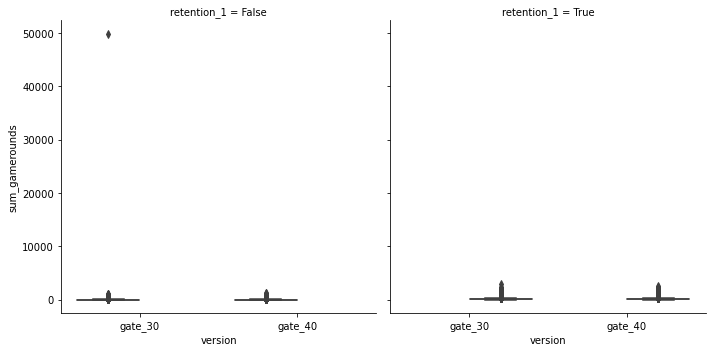

In [18]:
# Наглядное распределение
sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_1',
            data=df, kind="box");

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
np.mean(df.retention_1)

0.4452095044850259

In [20]:
(1 - 24062/38532), (1 - 24724/39141)

(0.3755320253295962, 0.3683349939960655)

In [21]:
ans_res1 = stats.ttest_ind(df[df.version=='gate_30'].retention_1,
                     df[df.version=='gate_40'].retention_1,  equal_var=False)
print('%.10f' % ans_res1.pvalue)

z1, p_value = sm.stats.proportions_ztest([(1 - 24062/38532), (1 - 24724/39141)], [38532, 39141])
print(p_value)

0.0744144371
0.9879464593045466


In [22]:
stats.ttest_ind(df[df.version=='gate_30'].retention_1,
                     df[df.version=='gate_40'].retention_1,  equal_var=False)

Ttest_indResult(statistic=1.7840774867039824, pvalue=0.07441443713953834)

Вероятность двух групп по t-критерию, p-value = 0.07 > 0,05. То есть принимаем нулевую гипотезу, что различий между g30, g40 нет. С другой стороны p-vlaue из z-теста 0,98, что подтверждает результат, полученный из t-теста.
Так же
этот результат также указывает на то, что одного дня может быть недостаточно для изучения влияния на удержание игроков. Так то время играет огромную роль почти во всех экспериментах, и не все действия происходят мгновенно. Иногда требуется больше времени для более точных и однозначных выводов.

#### 2.2 Проверьте гипотезу для возвращения через семь дней

In [23]:
df[['version','retention_7']].groupby('version').describe()

retention_7                     
              count unique    top   freq
version                                 
gate_30       44700      2  False  36198
gate_40       45489      2  False  37210

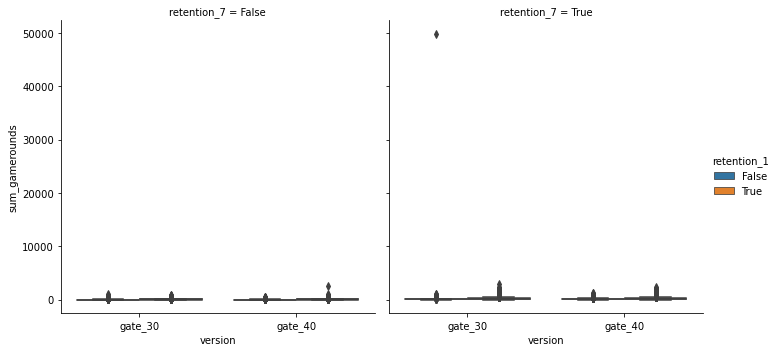

In [24]:
sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box");

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
np.mean(df.retention_7)

0.1860648194347426

In [26]:
(1 - 34418/38532), (1 - 35371/39141)

(0.10676840029066748, 0.09631843846605859)

In [27]:
# https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html
ans_res2 = stats.ttest_ind(df[df.version=='gate_30'].retention_7,
                     df[df.version=='gate_40'].retention_7,  equal_var=False)
print('%.10f' % ans_res2.pvalue)

z1, p_value = sm.stats.proportions_ztest([(1 - 34418/38532), (1 - 35371/39141)], [38532, 39141])
print(p_value)

0.0015565302
0.9786808438825753


p-значение = 0,00000143 из t-критерия << 0,05. А здесь уже однозначные выводы: эксперимент стал очень наглядным после того, как ему дали больше времени. Другими словами, через 7 дней в группе g40 осталось больше игроков, чем в контрольной группе g30.

Однако значение p, полученное из z-теста, составляет 0,978 >> 0,05. И это указывает на отсутствие существенной разницы между двумя группами. 

После 7 дней игры кажется, что удержание игроков в группе ворот высокого уровня значительно улучшилось по сравнению с t-тестом, но никакой разницы в z-тесте не видно. Это подтверждает, что z-тест более надежен для выборок в которых присутсвуют пропорции. Но количество игровых раундов, сыгранных игроком в течение первой недели после установки, кажется, не имеет _существенной_ разницы между двумя группами.
ТУТ ЕСТЬ 2 варианта: Дать больше времени эксперименту и подождать еще 1-2 недели, чтобы зафиксировать *retention_14, retention_21*, чтобы выделить существенные различия, либо стоит поработать с рекламной и инженерной командами, чтобы узнать другие возможные стратегии для улучшения.

### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
g40 = df[df.version=='gate_40'].sum_gamerounds.mean()
g30 = df[df.version=='gate_30'].sum_gamerounds.mean()
print(g40, g30, ((g30-g40)/g30*100),"%")

51.29877552814966 52.45626398210291 2.2065781397397313 %


Среднее количество на 0.16 или на 0.78% больше в gate_30 чем в gate_40

### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
g40 = df[df.version=='gate_40'].sum_gamerounds.median()
g30 = df[df.version=='gate_30'].sum_gamerounds.median()
print(g40, g30, g40-g30)

16.0 17.0 -1.0


по медиане совпадает

In [30]:
stats.ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
                df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

Полученное p = 0,37 >> 0,05 означает, что в целом нет существенной разницы в количестве игровых раундов, сыгранных игроком в течение первых 14 дней, как для группы g40, так и для группы g30.

## Задача 4: Время покемонов (3 балла)

В данной задаче вам будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

<p style="align: center;"><img align=center src="https://proprikol.ru/wp-content/uploads/2020/11/kartinki-pokemonov-2.jpg"  width=500></p>

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [31]:
import pandas as pd
df = pd.read_csv('pokemon.csv')
df.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [32]:
df.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [33]:
df.value_counts()

pid  Name                   Class 1   Class 2   HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
1    Bulbasaur              Grass     Poison    45   49      49       65       65       45     False        1
534  Wash Rotom             Electric  Water     50   65      107      105      107      86     False        1
554  Victini                Psychic   Fire      100  100     100      100      100      100    True         1
552  Shaymin Sky Forme      Grass     Flying    100  103     75       120      75       127    True         1
546  Giratina Origin Forme  Ghost     Dragon    150  120     100      120      100      90     True         1
                                                                                                           ..
279  Blaziken               Fire      Fighting  80   120     70       110      70       80     False        1
278  Combusken              Fire      Fighting  60   85      60       85       60       55     False        1
276  Mega Scept

In [34]:
df.isna().sum()  # есть пропуски

pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

### Вопрос 1

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

In [35]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
df[df["Class 1"] == "Grass"].nunique(), df[df["Class 1"] == "Rock"].nunique()

(pid          70
 Name         70
 Class 1       1
 Class 2      10
 HP           25
 Attack       37
 Defense      30
 Sp. Atk      40
 Sp. Def      29
 Speed        38
 Legendary     2
 dtype: int64,
 pid          44
 Name         44
 Class 1       1
 Class 2      12
 HP           23
 Attack       31
 Defense      27
 Sp. Atk      28
 Sp. Def      26
 Speed        27
 Legendary     2
 dtype: int64)

In [36]:
df[df["Class 1"] == "Grass"].mean()

pid          381.414286
HP            67.271429
Attack        73.214286
Defense       70.800000
Sp. Atk       77.500000
Sp. Def       70.428571
Speed         61.928571
Legendary      0.042857
dtype: float64

In [37]:
df[df["Class 1"] == "Rock"].mean()

pid          432.840909
HP            65.363636
Attack        92.863636
Defense      100.795455
Sp. Atk       63.340909
Sp. Def       75.477273
Speed         55.909091
Legendary      0.090909
dtype: float64

## Пока мало что понятно, посмотрим на графики

In [38]:
df[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack'].mean()

73.46315789473684

Text(0, 0.5, 'Count')

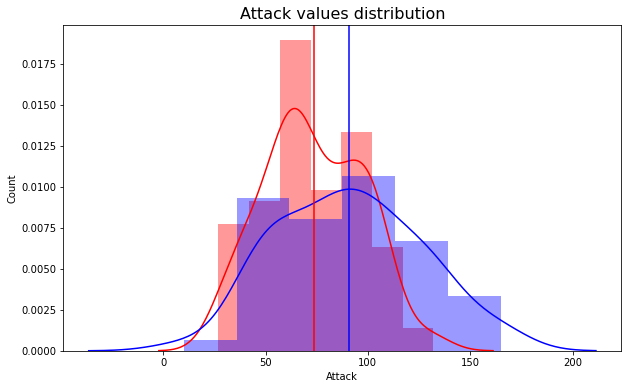

In [39]:
g = df[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack']
r = df[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]['Attack']
plt.figure(figsize=(10,6))
sns.distplot(df[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack'], hist=True, color = 'red')
sns.distplot(df[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]['Attack'], hist=True, color = 'b')
plt.axvline(x=g.mean(),color='red')
plt.axvline(x=r.mean(),color='blue')
plt.title('Attack values distribution', size=16)
plt.ylabel('Count')

In [40]:
# https://techrando.com/2019/11/21/determine-if-two-distributions-are-significantly-different-using-the-mann-whitney-u-test/
# https://stats.stackexchange.com/questions/481106/confused-about-the-mann-whitney-u-test-does-it-test-distribution-equality-pd

stat, p = mannwhitneyu(df[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack'],
                       df[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]['Attack'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1963.500, p=0.003


Нулевая гипотеза - нет стат. значимых различий, так как p < 0.01, то гипотезу отвергаем. В общем профессор не угадал...

### Вопрос 2

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, подтвердив свои выводы с помощью проверки статистических гипотез

In [41]:
df['Attack'].mean(), df['Defense'].mean()

(79.00125, 73.8425)

Text(0, 0.5, 'Count')

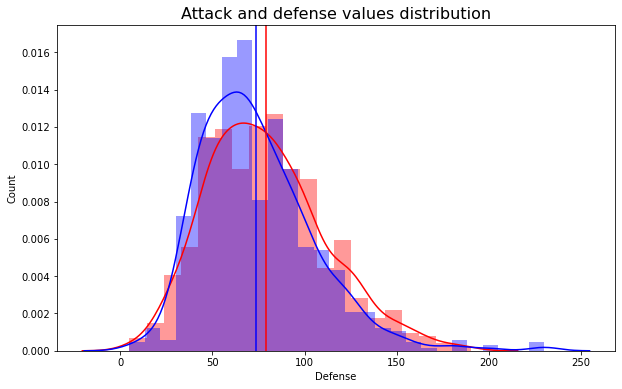

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
plt.figure(figsize=(10,6))
sns.distplot(df['Attack'], hist=True, color = 'red')
sns.distplot(df['Defense'], hist=True, color = 'b')
plt.axvline(x=df['Attack'].mean(),color='red')
plt.axvline(x=df['Defense'].mean(),color='blue')
plt.title('Attack and defense values distribution', size=16)
plt.ylabel('Count')

In [43]:
stat, p = mannwhitneyu(df['Attack'],
                       df['Defense'])
print('Statistics=%.3f, p=%.5f' % (stat, p))

Statistics=353385.000, p=0.00030


Нулевая гипотеза - нет стат. значимых различий, так как p < 0.01, то гипотезу отвергаем. То есть различия между силой обычной атаки и силой обычной защиты есть

### Вопрос 3

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

H0: mean <= 66.6
H1: mean > 66.6

In [44]:
df['Speed'].mean()

68.2775

Text(0, 0.5, 'Count')

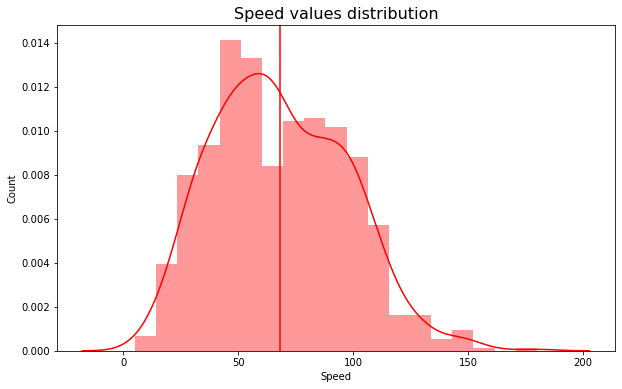

In [45]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
plt.figure(figsize=(10,6))
sns.distplot(df['Speed'], hist=True, color = 'red')
plt.axvline(x=df['Speed'].mean(),color='red')
plt.title('Speed values distribution', size=16)
plt.ylabel('Count')

In [46]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
# sp.stats.ttest_ind(df['Defense'], 66.6, equal_var=False)


In [47]:
mu_hat = df.loc[:,"Speed"].mean()

In [48]:
mu_hat

68.2775

In [49]:
std_hat = df.loc[:,"Speed"].values.std()

In [50]:
std_hat

29.042305241664273

In [51]:
test_stat = (mu_hat - 66.6) / (std_hat / np.sqrt(df.shape[0]))
crit_val = stats.t.ppf(0.01,df.shape[0] - 1)

In [52]:
print(test_stat)
print(crit_val)

1.6337155271527837
-2.331024023490564


так как test_value > crit_value, to нулевая гипотеза отклоняется, то есть принимается H1: средняя скорость покемонов больше 66.6 